In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import missingno as msno

# %matplotlib inline
# %matplotlib notebook

pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import SCORERS

from scipy.stats import randint

# 1. Year As Categorical Datatype

## Prepare data for machine learning

In [45]:
temp = pd.read_csv('temp.csv')
X = temp.drop('MSRP', axis=1)
y = temp['MSRP']

In [46]:
X['Year'].dtypes

,Psg_Cp,Psg_Doors,Basic_Miles,Basic_Year,Drivetrain_Miles,Drivetrain_Years,Road_Assist_Miles,Road_Assist_Years,Max_Alt_Cp,Maint_Miles,Maint_Year,Max_Alt_Watts,Weight,Trailer_cpt,Volume,Width,Height,Length,Size_avg,Num_safety,Fuel_Tank_Cpt,MPG_avg,MPG_City,MPG_Hwy,Trans_Speed,Battery_Amps,HP1,HP2,Displacement,Corrosion_Miles,Corrosion_Years,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,...,Engine_Type_Turbo Gas V8,Engine_Type_Turbo Gas/Ethanol I4,Engine_Type_Turbo Premium Unleaded I-4,Engine_Type_Turbo Regular Unleaded I-4,Engine_Type_Turbo/Supercharger Gas/Electric I-4,Engine_Type_Turbo/Supercharger Premium Unleaded I-4,Engine_Type_Turbocharged,Engine_Type_Turbocharged Diesel I4,Engine_Type_Turbocharged Diesel V6,Engine_Type_Turbocharged Diesel V8,Engine_Type_Turbocharged Diesel l4,Engine_Type_Turbocharged Gas,Engine_Type_Turbocharged Gas 4-Cyl,Engine_Type_Turbocharged Gas Flat 4,Engine_Type_Turbocharged Gas Flat 6,Engine_Type_Turbocharged Gas I4,Engine_Type_Turbocharged Gas I5,Engine_Type_Turbocharged Gas I6,Engine_Type_Turbocharged Gas V12,Engine_Type_Turbocharged Gas V6,Engine_Type_Turbocharged Gas V8,Engine_Type_Turbocharged Gas W12,Engine_Type_Turbocharged Gas/Electric I4,Engine_Type_Turbocharged Gas/Electric I6,Engine_Type_Turbocharged Gas/Electric V8,Engine_Type_Turbocharged Gas/Ethanol I4,Engine_Type_Turbocharged Gas/Ethanol L4,Engine_Type_Turbocharged Gas/Ethanol W12,Engine_Type_Turbocharged Gas/Plug-in Electric I4,Engine_Type_Turbocharged I4,Engine_Type_Turbocharged gas I4,Engine_Type_Twin Turbo Diesel I-4,Engine_Type_Twin Turbo Diesel I-6,Engine_Type_Twin Turbo Flexible V-8,Engine_Type_Twin Turbo Flexible W-12,Engine_Type_Twin Turbo Gas I6,Engine_Type_Twin Turbo Gas/Electric V-6,Engine_Type_Twin Turbo Gas/Electric V-8,Engine_Type_Twin Turbo Premium Unleaded H-6,Engine_Type_Twin Turbo Premium Unleaded I-6,Engine_Type_Twin Turbo Premium Unleaded V-12,Engine_Type_Twin Turbo Premium Unleaded V-6,Engine_Type_Twin Turbo Premium Unleaded V-8,Engine_Type_Twin Turbo Premium Unleaded W-12,Engine_Type_Twin Turbo Regular Unleaded V-6,Engine_Type_Twin Turbocharged Gas I6,Engine_Type_Twin Turbocharged Gas V6,Engine_Type_Twin Turbocharged Gas V8,Engine_Type_Twin-Scroll Turbocharged Gas I6,Engine_Type_Twin-Turbocharged Gas V8
0,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34465.0,3.0,1366.50,3093.0,5877.72,46.295,70.600,55.6,181.9,102.700000,11.0,13.200,29.00,25.00,36.00,8.0,410.000,180.0,201.0,2.40000,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.20,34465.0,3.0,1366.50,2959.0,5844.68,53.051,70.600,55.6,179.1,101.766667,10.0,13.200,38.00,39.00,38.00,1.0,347.545,127.0,111.0,1.50000,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34465.0,3.0,1366.50,2959.0,5834.20,53.051,70.600,55.6,179.1,101.766667,12.0,13.200,38.00,39.00,38.00,1.0,340.000,127.0,111.0,1.50000,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,146.75,34665.0,3.0,1476.75,2987.0,5852.77,52.822,70.600,55.6,179.1,101.766667,11.0,13.200,38.00,39.00,38.00,1.0,361.885,127.0,111.0,1.50000,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,4.0,50000.0,4.0,70000.0,6.0,50000.0,4.0,95.00,34465.0,3.0,1366.50,2987.0,5813.20,53.051,70.600,55.6,179.1,101.766667,12.0,13.200,38.00,39.00,38.00,1.0,340.000,127.0,111.0,1.50000,300000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32262 entries, 0 to 32261
Columns: 1464 entries, Psg_Cp to Engine_Type_Twin-Turbocharged Gas V8
dtypes: float64(31), uint8(1433)
memory usage: 52.0 MB


Since the data was aggregated by the car model and year in the dataset, it is necessary to shuffle the data. Otherwise, the train set and test test might be inclined to certain car models. The drawback is not seeing the variety during the learning and prediction score is biased.  Therefore, train_test_split is used here for the single purpose of shuffling the dataset. That is why the test_size is set very small, it is not really going to used for evaluation. The evaluation is done inside cross_val_score function using 20% of X_train and y_train, i.e., cv=5.

In [ ]:
# hold scores for different models
scores = {}

### Linear Regression

In [48]:
%%time
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create the regressor: reg_all
lr = LinearRegression()

cross_val_scores= cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')


scores['Linear regression'] = np.mean(cross_val_scores)

print('Linear Regression Cross-Validation Scores:')
for score in cross_val_scores:
    print(score)
print('Average Score:', scores['Linear regression'])



Linear Regression Cross-Validation Scores:
0.9577187827896483
-1285427.7527462444
-849013.9401051943
0.9676774403198397
-109875.98812926706
Average Score: -448863.15111689654
Wall time: 14.9 s


## Ridge Regression

In [49]:
%%time
# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

ridge = Ridge(random_state=42)

cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Ridge Regression"])#

Ridge Regression Cross-Validation Scores:
0.9569847607470382
0.9634397575468795
0.9595918910628586
0.96038553225033
0.9603833721617898
Average Score: 0.9601570627537793
Wall time: 5.35 s


## Lasso Regression

In [50]:
%%time
from sklearn.linear_model import Lasso

# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

lasso = Lasso(random_state=42)

cross_val_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='r2')
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score on 5-Folds:', scores["Lasso Regression"])


Lasso Regression Cross-Validation Scores:
0.9564385242141449
0.9682116871300727
0.9624143184449144
0.9696037907826216
0.9608774854586898
Average Score on 5-Folds: 0.9635091612060886
Wall time: 2min 14s


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor

# shuffle dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

trees = DecisionTreeRegressor(max_depth=6, random_state=42)

cross_val_scores = cross_val_score(trees, X_train, y_train, cv=5, scoring='r2')

scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
0.9066674884634536
0.915509570965381
0.9163068640834541
0.8946972401602027
0.9289115429850586
Average Score: 0.91241854133151


# Random Forest

In [52]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

predicted_test = rf.predict(X_test)
test_score = r2_score(y_test, predicted_test)
scores["Random Forest"] = test_score
print('Test score:', test_score)

Test score: 0.9849823688947472
Wall time: 2min 31s


In [53]:
scores = sorted(scores.items(), key=lambda score: score[1], reverse=True)

for i in range(len(scores)):
    print(scores[i][0], scores[i][1])

Random Forest 0.9849823688947472
Lasso Regression 0.9635091612060886
Ridge Regression 0.9601570627537793
Decision Tree 0.91241854133151
Linear regression -448863.15111689654


Random Forest shows the best performance.

In [ ]:
scores_r2 = scores

## Evaluate Algorithms Using Mean Absolute Error Metric

In [ ]:
# hold scores for different models
scores = {}

### Linear Regression

In [54]:
%%time
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Create the regressor: reg_all
lr = LinearRegression()

cross_val_scores= cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')


scores['Linear regression'] = np.mean(cross_val_scores)

print('Linear Regression Cross-Validation Scores:')
for score in cross_val_scores:
    print(score)
print('Average Score:', scores['Linear regression'])

# lr.fit(X_test, y_test)
# predicted_test = lr.predict(X_test)
# test_score = r2_score(y_test, predicted_test)
# final_scores["Lasso"] = test_score
# print('Final score:', test_score)

Linear Regression Cross-Validation Scores:
-3107.5901667616463
-1005762.7352650865
-1363465.2669425535
-3062.775327804503
-531476.1519562795
Average Score: -581374.9039316971
Wall time: 13.4 s


In [55]:
# sorted(SCORERS.keys())

## Ridge Regression

In [56]:
%%time
# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

ridge = Ridge(random_state=42)

cross_val_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores["Ridge Regression"] = np.mean(cross_val_scores)

print("Ridge Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Ridge Regression"])#

Ridge Regression Cross-Validation Scores:
-3542.574739123339
-3660.976692063472
-3679.3639024347776
-3508.7170945004364
-3451.792051633825
Average Score: -3568.68489595117
Wall time: 4.84 s


## Lasso Regression

In [57]:
%%time
from sklearn.linear_model import Lasso

# shuffle the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

lasso = Lasso(random_state=42)

cross_val_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores["Lasso Regression"] = np.mean(cross_val_scores)

print("Lasso Regression Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score on 5-Folds:', scores["Lasso Regression"])

Lasso Regression Cross-Validation Scores:
-3305.849725719422
-3377.5906141713517
-3413.116671769431
-3216.9639078976315
-3244.204120125044
Average Score on 5-Folds: -3311.5450079365755
Wall time: 2min 13s


## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeRegressor

# shuffle dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

trees = DecisionTreeRegressor(max_depth=6, random_state=42)

cross_val_scores = cross_val_score(trees, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

scores["Decision Tree"] = np.mean(cross_val_scores)

print("Decision Tree Cross-Validation Scores:")
for score in cross_val_scores:
    print(score)
print('Average Score:', scores["Decision Tree"])

Decision Tree Cross-Validation Scores:
-5674.9350504605145
-5733.086608909814
-5721.8150255295595
-5616.736592927725
-5449.626952313513
Average Score: -5639.240046028225


# Random Forest

In [59]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                           n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

rf.fit(X_train, y_train)

predicted_test = rf.predict(X_test)
test_score = -1 * mean_absolute_error(y_test, predicted_test)
scores["Random Forest"] = test_score
print('Test score:', test_score)

Test score: -1513.987468146426
Wall time: 2min 33s


In [60]:
print('Test score:', test_score)

Test score: -1513.987468146426


In [61]:
scores = sorted(scores.items(), key=lambda score: score[1], reverse=True)

for i in range(len(scores)):
    print(scores[i][0], scores[i][1])

Random Forest -1513.987468146426
Lasso Regression -3311.5450079365755
Ridge Regression -3568.68489595117
Decision Tree -5639.240046028225
Linear regression -581374.9039316971


### Summary of Scores

| Models | r2_score | mean_absolute_error |
| :- | -: | :-: |
| Random Forest | 0.986 | -1002483
|Linear regression|0.968|-1002483
|Lasso Regression|0.967|-3262
|Ridge Regression|0.964|-3525
|Decision Tree |0.908|-5470

Most of the models used give excellent goodness of fit that their r2 scores are mostly above 0.96. This indicate these models are of good choice.
Random Forest gives the best performance with r2 being very close to 0.99. Decision Tree has the poorest performance with a r2_score of 0.908.
The reason that Random Forest is about 0.02 higher in r2_score than linear approach is because there are a lot of categorical features in the dataset that are more meaningful in decision making instead of numeric significance.
The mean absolute error from sklearn.metrics was also used to examine model performance. The scores are listed in the table above. It can be seen Decision Trees still tops the perforce. Scoring for Linear Regression is, however, exceedingly low. This tell us selection of metrics has a great influence on ranking the performance of algorithms.
Feature Importance
The feature importance results are shown in the table below. The bar graph shows top 20 features. 


The HP2 (torque spec) has the highest importance, which is at least 4 times higher than the rest. The 2nd highest is Displacement, which is at least 2 times higher than the rest. These top 2 features are all specs related to car engines. The engine is the heart of a car that is the most dominating part for the major performance of car for example the car’s lifetime, speed, driving smoothness, horsepower, fuel efficiency, etc. So, their influence on car price should be greater than other features.

Basic_Miles and Driverain_Years are in the warranty category and are surprisingly in the top ranking. The domain knowledge is required to explain it.

Size_avg, Volume, Width, Length, and Height are specs for car’s dimensions. Their feature importance is somewhat close to each other and ranges from 0.011 to 0.016. This again proves the Decision Tree is an intelligent ensemble learning method.

HP1 is the horse power. Its feature importance is 0.01 that is 52 times lower than that of torque spec (HP2). Careful examination of two series of the data reveal HP1/HP2 ratio has a wide range from 0.5 to 10.8, in stead of being a constant. This is probably because the car manufacturers are not adopting the same engine speed to obtain horsepower and torque specs. The following figure helps to understand that the horsepower follows a nearly linear relationship with engine speed, however, the torque doesn’t. 

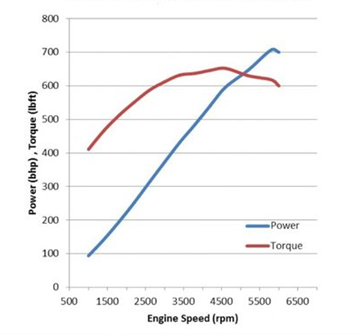
courtesy: https://www.caranddriver.com/news/a15347872/horsepower-vs-torque-whats-the-difference/

Weight ranks 14th. Miles per gallon MPG_City ranks 16th. It is common knowledge that a heavier car consumes proportionally higher amount of gasoline per mile. This model precisely reveals the close relationship between the two specs. 

Some car models like Model_Lamborghini Aventador, Model_Maserati Quattroporte, and Model_Bentley Continental GT are in top 50 important features and are more important than technical specs. For example, the feature importance of Model_Lamborghini Aventador is greater than that of number of passenger doors. This is probably because these are luxury cars that have a lot of weight on price tag.


In [62]:
# HP1 and HP2 has very different feature importance.
horse_ratio = X['HP1'] / X['HP2']


In [63]:
print(min(horse_ratio.unique()), max(horse_ratio.unique()))

0.4669811320754717 10.806451612903226


## Feature Importance

In [64]:
fi = rf.feature_importances_
importance = pd.DataFrame(fi, index=X.columns, columns=['importance'])
importance = importance.reset_index()
importance = importance.rename(columns={'index': 'feature'})
importance_20 = importance.sort_values(['importance'], ascending=False).head(20)

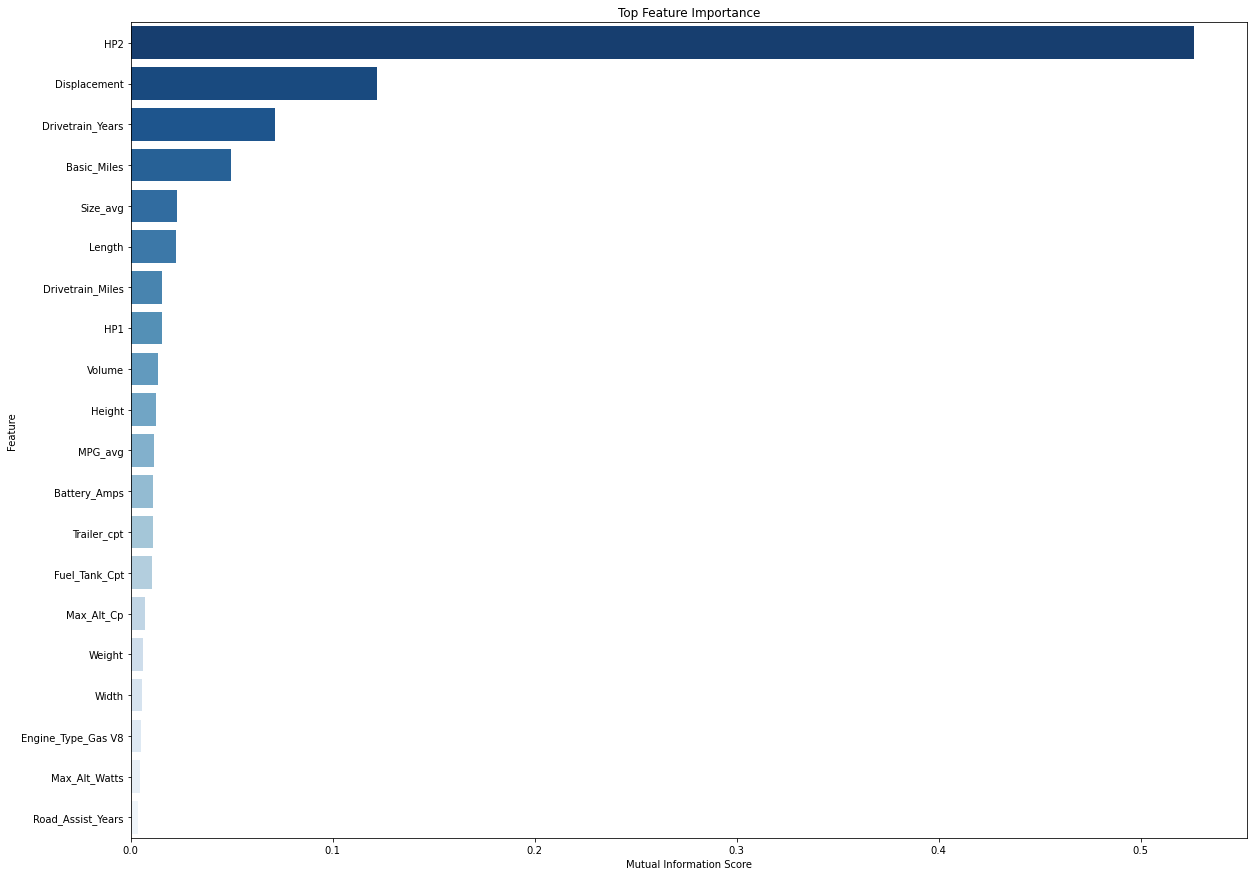

In [65]:
# top_features = np.array(feature_scores[:20])

f, axes = plt.subplots(figsize=(20,15))
ax = sns.barplot(x=importance_20['importance'],
                 y=importance_20['feature'],
                 palette = "Blues_r")
ax.set(title="Top Feature Importance", xlabel="Mutual Information Score", \
       ylabel="Feature")
plt.show()

Horsepower, displacement, drivetrain years and basic miles are the most important features.

In [66]:
importance.sort_values('importance', ascending=False)[:80]

,feature,importance
27,HP2,0.526239
28,Displacement,0.121849
5,Drivetrain_Years,0.071169
2,Basic_Miles,0.049664
18,Size_avg,0.022719
...,...,...
521,EPA_Class_Large Cars,0.000177
683,Tire_P_Monitor_No,0.000174
663,Airbag_SBR_No,0.000165
519,EPA_Class_Large,0.000159


In [67]:
imp = importance.sort_values('importance', ascending=False).reset_index(drop=True)

print(imp.iloc[:50, :])

                                         feature  importance
0                                            HP2    0.526239
1                                   Displacement    0.121849
2                               Drivetrain_Years    0.071169
3                                    Basic_Miles    0.049664
4                                       Size_avg    0.022719
5                                         Length    0.022548
6                               Drivetrain_Miles    0.015306
7                                            HP1    0.015200
8                                         Volume    0.013250
9                                         Height    0.012275
10                                       MPG_avg    0.011236
11                                  Battery_Amps    0.011147
12                                   Trailer_cpt    0.010736
13                                 Fuel_Tank_Cpt    0.010653
14                                    Max_Alt_Cp    0.007066
15                      

## Conclusions
Tremendous efforts were made on data wrangling/cleaning. A small program was coded to successfully impute missing entries in the weight data. This imputation strategy relies on insightful domain knowledge. 

Using hypothesis testing, it was found there is significant difference in the mean price between two low-end popular car models: Hyundai Accent and Honda Civic. 

Exploratory data analysis was conducted to visualize missing values over all dataset, provide buying guide for low-income customers by extracting all lowly-priced car models and sorting in order. The pair plot and heatmap indicate a positive correlation between horsepower and engine displacement, which agrees well with physics and engineering principles. Linear line fit well the correlations between size and displacement, horsepower and MPG, price and horsepower, price and weight.
Imputation and one-hot encoding were done prior to apply various machine learning algorithms. We take advantage of machine learning algorithm called Missforest to automatically fill a large amount of missing values, which is one of the reasons we end up with very high predicting accuracy. 

Five models were experimented including linear regression, ridge regression, lasso regression, decision trees and random forest. Except lower performance of decision trees, all the other models deliver very good r2 scores higher than 96%. The best model is random forest that scored close to 99%.

Feature importance analysis revealed the torque spec (HP1) and displacement are the most important factor determining the car prices. This result indicate the power of random forest because these two features are related to the heart of car: engine. 

## Future Work
-	Acquire more domain knowledge for the purpose of feature engineering
        - remove unnecessary features    
        - create new features
-	Tune models hyperparameters to marginally improve performance
-	Obtain data for newer car models to test the model
